In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin     

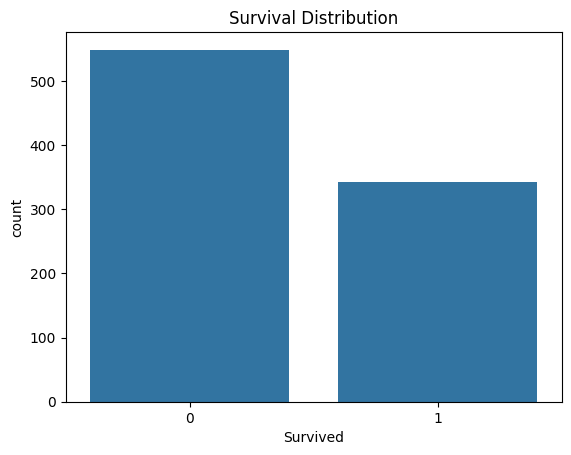

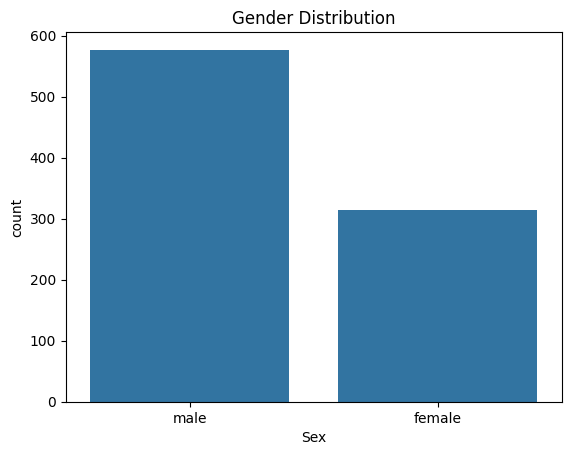

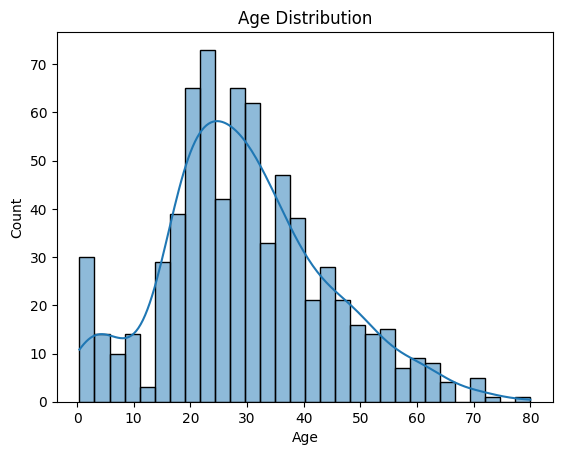

In [5]:
# Survival count
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.show()

# Gender count
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.dropna(subset=['Fare'], inplace=True)

<ipython-input-6-303c2d2de646>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-303c2d2de646>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])         # male:1, female:0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C:0, Q:1, S:2
df['Pclass'] = df['Pclass'].astype(str)
df['Pclass'] = le.fit_transform(df['Pclass'])

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [9]:
# Normalize numerical
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,3,1,2,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,2,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,-0.181487,0,0,211536,-0.386671,2
887,888,1,0,"Graham, Miss. Margaret Edith",0,-0.796286,0,0,112053,-0.044381,2
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,-0.104637,1,2,W./C. 6607,-0.176263,2
889,890,1,0,"Behr, Mr. Karl Howell",1,-0.258337,0,0,111369,-0.044381,0


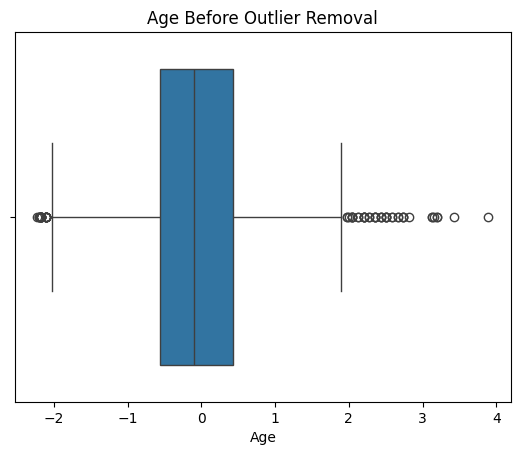

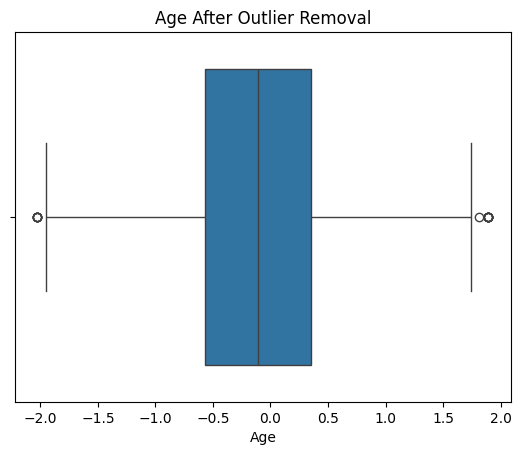

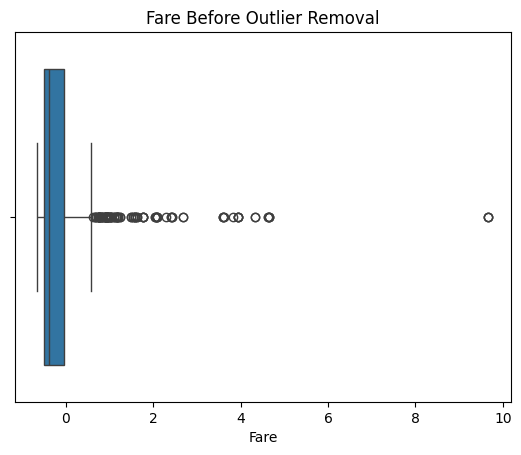

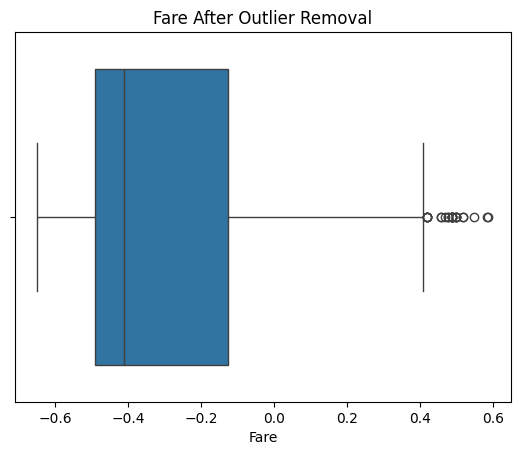

In [11]:
for col in ['Age', 'Fare']:
    # Before
    sns.boxplot(x=df[col])
    plt.title(f'{col} Before Outlier Removal')
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

    # After
    sns.boxplot(x=df[col])
    plt.title(f'{col} After Outlier Removal')
    plt.show()

In [13]:
print("\nCleaned Info:")
print(df.info())
print("\nCleaned Missing Values:")
print(df.isnull().sum())


Cleaned Info:
<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    int64  
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Embarked     718 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 67.3+ KB
None

Cleaned Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
